# MLE challenge - Train model notebook

### Notebook 2

In this notebook, we train the model with a few features (for reasons of time and complexity in solving the challenge). It also shows how to persist the model in a file, load it into memory and then make a predict.



In [2]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, recall_score, 
    plot_confusion_matrix, precision_score, plot_roc_curve
)

from sklearn.ensemble import RandomForestClassifier

#### Read dataset

In [3]:
df = pd.read_csv('train_model.csv')

In [4]:
df.head()

,id,age,years_on_the_job,nb_previous_loans,avg_amount_loans_previous,flag_own_car,status
0,5008804,33,13.0,0.0,NaN,1,0
1,5008804,33,13.0,1.0,102.283361,1,0
2,5008804,33,13.0,2.0,119.442705,1,0
3,5008804,33,13.0,3.0,117.873035,1,0
4,5008804,33,13.0,4.0,114.289538,1,0


In [5]:
df.dtypes

id                             int64
age                            int64
years_on_the_job             float64
nb_previous_loans            float64
avg_amount_loans_previous    float64
flag_own_car                   int64
status                         int64
dtype: object

<AxesSubplot:>

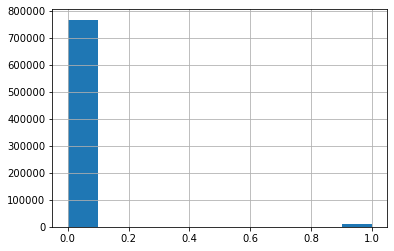

In [6]:
df.status.hist()

In [7]:
cust_df = df.copy()

In [8]:
cust_df.fillna(0, inplace=True)

## Train model

In [9]:
Y = cust_df['status'].astype('int')

cust_df.drop(['status'], axis=1, inplace=True)
cust_df.drop(['id'], axis=1, inplace=True)


X = cust_df

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    stratify=Y, test_size=0.3,
                                                    random_state = 123)

In [11]:
# Using Synthetic Minority Over-Sampling Technique(SMOTE) to overcome sample imbalance problem.
#Y = Y.astype('int')
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_train, columns=X.columns)

In [12]:
X_train

,age,years_on_the_job,nb_previous_loans,avg_amount_loans_previous,flag_own_car
0,52,13.000000,31.000000,153.289289,0
1,35,2.000000,11.000000,117.226176,0
2,61,0.000000,8.000000,122.305350,1
3,38,8.000000,23.000000,132.961910,1
4,53,9.000000,41.000000,133.774108,0
...,...,...,...,...,...
1072591,46,2.078046,34.078046,124.056808,0
1072592,24,2.000000,11.974836,146.329286,0
1072593,31,6.771510,18.771510,123.789628,0
1072594,37,2.000000,18.579089,127.170488,1


Accuracy Score is 0.95516
Precision Score is 0.043268
Recall Score is 0.043268
        0     1
0  222523  7319
1    3142   331


C:\Users\gonzalo.saravia\Miniconda3\envs\drift_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


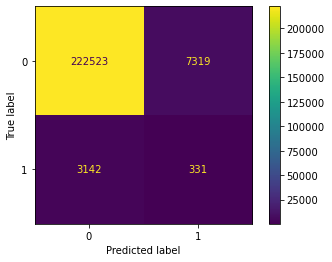

In [13]:
model = RandomForestClassifier(n_estimators=5)

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(precision_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

plot_confusion_matrix(model, X_test, y_test)  
plt.show()


C:\Users\gonzalo.saravia\Miniconda3\envs\drift_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


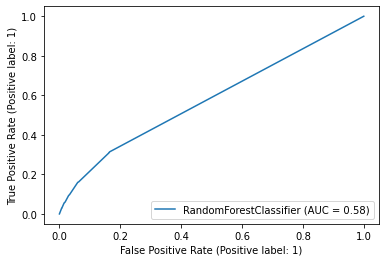

In [14]:
plot_roc_curve(model, X_test, y_test)
plt.show()

## Model persistance

In [15]:
from joblib import dump, load

In [16]:
# dump model
dump(model, 'model_risk.joblib') 

['model_risk.joblib']

### Load model & predict

In [17]:
my_model = load('model_risk.joblib') 

In [18]:
# example dict 'user_id' -> features
d = {
    '5008804': [32, 12, 2, 119.45, 1],
    '5008807': [65, 0, 1, 10000, 1]
}

In [19]:
my_model.predict([d['5008807']])

C:\Users\gonzalo.saravia\Miniconda3\envs\drift_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])